## Problem
Menyelesaikan permasalahan searching  untuk mencari tempat wisata berdasarkan kegiatan yang ingin di lakukan

<h3>Preparation</h3>

In [1]:
import pandas as pd

df = pd.read_csv("clean_dataset.csv")
df.head()

,Kota,Name,Address,Header_image,Rating,Category,Detail_URL,Tags,Latitude,Longitude,Website,Phone,Review,Description
0,bulukumba,kawasan adat kajang ammatoa,"Tanah Toa, Kec. Kajang, Kabupaten Bulukumba, S...",https://lh5.googleusercontent.com/p/AF1QipPCW4...,4.7,religi,https://www.google.com/maps/place/Kawasan+Adat...,"\n""Wisata Budaya yang paling berkesan, udara ...","-53,219,881","1,202,959,252",NaN,NaN,"budaya,pakaian,adat istiadat,teknologi,kaki,li...",Kawasan Adat Kajang Ammatoa adalah sebuah kawa...
1,bulukumba,pantai marumasa,"Darubiah, Kec. Bonto Bahari, Kabupaten Bulukum...",https://lh5.googleusercontent.com/p/AF1QipOFb3...,4.4,pantai,https://www.google.com/maps/place/Pantai+Marum...,"\n""Yang suka wisata pantai, ini juga keren""","-55,753,658","1,204,593,842",https://pantaitebingmarumasa.wordpress.com/201...,0813-5583-8483,"pantainya,foto,pemandangan,tebing,sampah,keind...",Pantai Marumasa adalah sebuah pantai indah yan...
2,bulukumba,"pantai bara, bulukumba","Bira, Kec. Bonto Bahari, Kabupaten Bulukumba, ...",https://lh5.googleusercontent.com/p/AF1QipNvH_...,4.6,danau,"https://www.google.com/maps/place/Pantai+Bara,...","\n""Tempat wisata yang menyenangkan.""","-56,082,681","1,204,389,893",NaN,NaN,"pasir,air,pemandangan,parkir,banana boat,malam...",Pantai Bara adalah pantai menakjubkan lainnya ...
3,bulukumba,pantai pulau liukang loe,"Bira, Kec. Bonto Bahari, Kabupaten Bulukumba, ...",https://lh5.googleusercontent.com/p/AF1QipPdqP...,4.6,pantai,https://www.google.com/maps/place/Pantai+Pulau...,"\n""Di pulau ini terdapat penangkaran penyu Da...","-56,409,546","1,204,332,732",NaN,0822-9126-2332,"snorkling,penyu,pantai tanjung bira,perahu,pen...",Pantai Pulau Liukang Loe adalah pantai indah y...
4,bulukumba,puncak pua' janggo',"Bira, Kec. Bonto Bahari, Kabupaten Bulukumba, ...",https://lh5.googleusercontent.com/p/AF1QipP2nE...,4.3,alam,https://www.google.com/maps/place/Puncak+Pua%2...,NaN,"-56,083,071","1,204,602,636",NaN,0813-1412-1220,"pemandangan,pantai tanjung bira,pelabuhan,moto...",Puncak Pua' Janggo' adalah puncak gunung yang ...


Membuang field yang tidak terpakai

In [2]:
df.drop(columns=["Header_image", "Detail_URL", "Tags", "Latitude", "Longitude", "Website", "Phone"], axis=1, inplace=True)
df.head()

,Kota,Name,Address,Rating,Category,Review,Description
0,bulukumba,kawasan adat kajang ammatoa,"Tanah Toa, Kec. Kajang, Kabupaten Bulukumba, S...",4.7,religi,"budaya,pakaian,adat istiadat,teknologi,kaki,li...",Kawasan Adat Kajang Ammatoa adalah sebuah kawa...
1,bulukumba,pantai marumasa,"Darubiah, Kec. Bonto Bahari, Kabupaten Bulukum...",4.4,pantai,"pantainya,foto,pemandangan,tebing,sampah,keind...",Pantai Marumasa adalah sebuah pantai indah yan...
2,bulukumba,"pantai bara, bulukumba","Bira, Kec. Bonto Bahari, Kabupaten Bulukumba, ...",4.6,danau,"pasir,air,pemandangan,parkir,banana boat,malam...",Pantai Bara adalah pantai menakjubkan lainnya ...
3,bulukumba,pantai pulau liukang loe,"Bira, Kec. Bonto Bahari, Kabupaten Bulukumba, ...",4.6,pantai,"snorkling,penyu,pantai tanjung bira,perahu,pen...",Pantai Pulau Liukang Loe adalah pantai indah y...
4,bulukumba,puncak pua' janggo',"Bira, Kec. Bonto Bahari, Kabupaten Bulukumba, ...",4.3,alam,"pemandangan,pantai tanjung bira,pelabuhan,moto...",Puncak Pua' Janggo' adalah puncak gunung yang ...


Menambahkan index untuk mempermudah dalam pencarian

In [3]:
df.reset_index(inplace=True)

In [4]:
df.head()

,index,Kota,Name,Address,Rating,Category,Review,Description
0,0,bulukumba,kawasan adat kajang ammatoa,"Tanah Toa, Kec. Kajang, Kabupaten Bulukumba, S...",4.7,religi,"budaya,pakaian,adat istiadat,teknologi,kaki,li...",Kawasan Adat Kajang Ammatoa adalah sebuah kawa...
1,1,bulukumba,pantai marumasa,"Darubiah, Kec. Bonto Bahari, Kabupaten Bulukum...",4.4,pantai,"pantainya,foto,pemandangan,tebing,sampah,keind...",Pantai Marumasa adalah sebuah pantai indah yan...
2,2,bulukumba,"pantai bara, bulukumba","Bira, Kec. Bonto Bahari, Kabupaten Bulukumba, ...",4.6,danau,"pasir,air,pemandangan,parkir,banana boat,malam...",Pantai Bara adalah pantai menakjubkan lainnya ...
3,3,bulukumba,pantai pulau liukang loe,"Bira, Kec. Bonto Bahari, Kabupaten Bulukumba, ...",4.6,pantai,"snorkling,penyu,pantai tanjung bira,perahu,pen...",Pantai Pulau Liukang Loe adalah pantai indah y...
4,4,bulukumba,puncak pua' janggo',"Bira, Kec. Bonto Bahari, Kabupaten Bulukumba, ...",4.3,alam,"pemandangan,pantai tanjung bira,pelabuhan,moto...",Puncak Pua' Janggo' adalah puncak gunung yang ...


Mengganti nama field untuk mudah di mengerti

In [5]:
df.rename(columns={
    "index" : "id",
    "Kota": "kota",
    "Name" : "nama",
    "Address" : "jalan",
    "Rating": "rating",
    "Category": "kategori",
    "Review": "review",
    "Description": "deskripsi"
    }, inplace=True)

In [6]:
df.head()

,id,kota,nama,jalan,rating,kategori,review,deskripsi
0,0,bulukumba,kawasan adat kajang ammatoa,"Tanah Toa, Kec. Kajang, Kabupaten Bulukumba, S...",4.7,religi,"budaya,pakaian,adat istiadat,teknologi,kaki,li...",Kawasan Adat Kajang Ammatoa adalah sebuah kawa...
1,1,bulukumba,pantai marumasa,"Darubiah, Kec. Bonto Bahari, Kabupaten Bulukum...",4.4,pantai,"pantainya,foto,pemandangan,tebing,sampah,keind...",Pantai Marumasa adalah sebuah pantai indah yan...
2,2,bulukumba,"pantai bara, bulukumba","Bira, Kec. Bonto Bahari, Kabupaten Bulukumba, ...",4.6,danau,"pasir,air,pemandangan,parkir,banana boat,malam...",Pantai Bara adalah pantai menakjubkan lainnya ...
3,3,bulukumba,pantai pulau liukang loe,"Bira, Kec. Bonto Bahari, Kabupaten Bulukumba, ...",4.6,pantai,"snorkling,penyu,pantai tanjung bira,perahu,pen...",Pantai Pulau Liukang Loe adalah pantai indah y...
4,4,bulukumba,puncak pua' janggo',"Bira, Kec. Bonto Bahari, Kabupaten Bulukumba, ...",4.3,alam,"pemandangan,pantai tanjung bira,pelabuhan,moto...",Puncak Pua' Janggo' adalah puncak gunung yang ...


In [6]:
df["kota"] = df["kota"].str.lower()
df["nama"] = df["nama"].str.lower()
df["jalan"] = df["jalan"].str.lower()
df["kategori"] = df["kategori"].str.lower()
df["review"] = df["review"].str.lower()
df["deskripsi"] = df["deskripsi"].str.lower()
df.head()

,id,kota,nama,jalan,rating,kategori,review,deskripsi
0,0,bulukumba,kawasan adat kajang ammatoa,"tanah toa, kec. kajang, kabupaten bulukumba, s...",4.7,religi,"budaya,pakaian,adat istiadat,teknologi,kaki,li...",kawasan adat kajang ammatoa adalah sebuah kawa...
1,1,bulukumba,pantai marumasa,"darubiah, kec. bonto bahari, kabupaten bulukum...",4.4,pantai,"pantainya,foto,pemandangan,tebing,sampah,keind...",pantai marumasa adalah sebuah pantai indah yan...
2,2,bulukumba,"pantai bara, bulukumba","bira, kec. bonto bahari, kabupaten bulukumba, ...",4.6,danau,"pasir,air,pemandangan,parkir,banana boat,malam...",pantai bara adalah pantai menakjubkan lainnya ...
3,3,bulukumba,pantai pulau liukang loe,"bira, kec. bonto bahari, kabupaten bulukumba, ...",4.6,pantai,"snorkling,penyu,pantai tanjung bira,perahu,pen...",pantai pulau liukang loe adalah pantai indah y...
4,4,bulukumba,puncak pua' janggo',"bira, kec. bonto bahari, kabupaten bulukumba, ...",4.3,alam,"pemandangan,pantai tanjung bira,pelabuhan,moto...",puncak pua' janggo' adalah puncak gunung yang ...


<h3>Cek field yang kosong</h3>

In [7]:
df.isnull().sum()

id           0
kota         0
nama         0
jalan        0
rating       0
kategori     0
review       0
deskripsi    1
dtype: int64

In [8]:
df[df["deskripsi"].isnull()]

,id,kota,nama,jalan,rating,kategori,review,deskripsi
165,165,pinrang,pantai lowita - vila mutiara,"jl. poros ujung lero, tasiwalie, kec. suppa, k...",4.4,pantai,"keluarga,pantainya,rekreasi,airnya",NaN


In [9]:
df.loc[165, "deskripsi"] = "Pantai Lowita Vila Mutiara adalah sebuah destinasi pantai yang menakjubkan dan indah yang terletak di tepi pantai yang memukau di wilayah Lowita. Terletak di sebuah kawasan yang tenang dan alami, pantai ini menawarkan pemandangan yang menakjubkan dari laut biru yang jernih, pasir putih yang halus, dan pohon-pohon kokoh yang menghiasi garis pantainya."

In [10]:
df.isnull().sum()

id           0
kota         0
nama         0
jalan        0
rating       0
kategori     0
review       0
deskripsi    0
dtype: int64

In [11]:
df.head()

,id,kota,nama,jalan,rating,kategori,review,deskripsi
0,0,bulukumba,kawasan adat kajang ammatoa,"tanah toa, kec. kajang, kabupaten bulukumba, s...",4.7,religi,"budaya,pakaian,adat istiadat,teknologi,kaki,li...",kawasan adat kajang ammatoa adalah sebuah kawa...
1,1,bulukumba,pantai marumasa,"darubiah, kec. bonto bahari, kabupaten bulukum...",4.4,pantai,"pantainya,foto,pemandangan,tebing,sampah,keind...",pantai marumasa adalah sebuah pantai indah yan...
2,2,bulukumba,"pantai bara, bulukumba","bira, kec. bonto bahari, kabupaten bulukumba, ...",4.6,danau,"pasir,air,pemandangan,parkir,banana boat,malam...",pantai bara adalah pantai menakjubkan lainnya ...
3,3,bulukumba,pantai pulau liukang loe,"bira, kec. bonto bahari, kabupaten bulukumba, ...",4.6,pantai,"snorkling,penyu,pantai tanjung bira,perahu,pen...",pantai pulau liukang loe adalah pantai indah y...
4,4,bulukumba,puncak pua' janggo',"bira, kec. bonto bahari, kabupaten bulukumba, ...",4.3,alam,"pemandangan,pantai tanjung bira,pelabuhan,moto...",puncak pua' janggo' adalah puncak gunung yang ...


<h3>Mengecek kategori</h3>

kategori yang valid:<ol>
<li>alam</li>
<li>pantai</li>
<li>tanaman</li>
<li>Permandian</li>
<li>Museum</li>
<li>air terjun</li>
<li>religi</li>
<li>danau</li>
</ol>

<Axes: xlabel='kategori'>

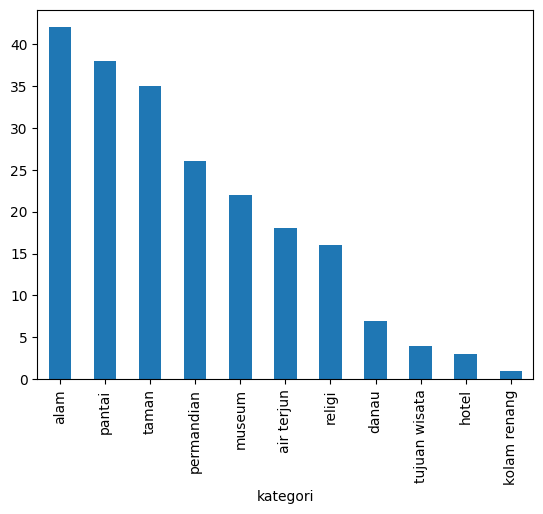

In [12]:
df["kategori"].value_counts().plot.bar()

In [13]:
df[df["kategori"] == "tujuan wisata"]

,id,kota,nama,jalan,rating,kategori,review,deskripsi
22,22,bone,permandian jompi'e,"liliriawang, kec. bengo, kabupaten bone, sulaw...",4.2,tujuan wisata,"kebersihan,pemandangan,anak,airnya",permandian jompi'e adalah destinasi wisata yan...
55,55,makassar,pantai tanjung barat barombong,"barombong, kec. tamalate, kota makassar, sulaw...",4.4,tujuan wisata,"sampah,laut,mandi,sunset,kebersihan,pemandanga...",pantai tanjung barat barombong adalah sebuah p...
94,94,pinrang,pantai harapan ammani,"pantai harapan ammani, mattiro tasi, kec. matt...",4.2,tujuan wisata,"keluarga,pantainya,ikan bakar,karaoke,seafood,...",pantai harapan ammani adalah sebuah pantai yan...
140,140,toraja utara,objek wisata palawa',"palawa', kec. sesean, kabupaten toraja utara, ...",4.4,tujuan wisata,"tongkonan,rumah adat,atap,desa,lumbung padi,up...",objek wisata palawa' adalah sebuah tempat wisa...


In [15]:
df.at[22, "kategori"] = "permandian"
df.at[55, "kategori"] = "pantai"
df.at[94, "kategori"] = "pantai"
df.at[140, "kategori"] = "alam"

In [ ]:
df[df["nama"] = "objek wisata palawa"]

In [16]:
df[df["kategori"] == "kolam renang"]

,id,kota,nama,jalan,rating,kategori,review,deskripsi
36,36,bantaeng,kolam renang erbol (ere borong lompoa indah),"campaga, kec. tompobulu, kabupaten bantaeng, s...",4.3,kolam renang,"dingin,wisata,parkir,mata air,rumah,luas,dewas...",kolam renang erbol (ere borong lompoa indah) a...


In [14]:
df.at[36, "kategori"] = "permandian"

In [17]:
df[df["kategori"] == "hotel"]

,id,kota,nama,jalan,rating,kategori,review,deskripsi
89,89,parepare,hotel satria wisata,"jl. abubakar lambogo no.83, bukit indah, kec. ...",4.2,hotel,"wifi,kolam renang",hotel satria wisata adalah sebuah hotel yang t...
92,92,parepare,hotel pare wisata,"jl. sulawesi no.45, ujung sabbang, kec. ujung,...",3.9,hotel,"sarapan,wifi",hotel pare wisata adalah sebuah hotel yang ter...


In [16]:
df.at[167, "kategori"] = "alam"

In [18]:
df.drop(index=[89, 92], inplace=True)

<Axes: xlabel='kategori'>

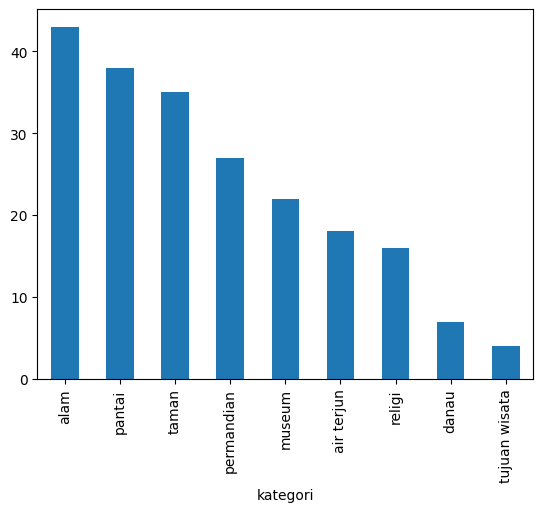

In [21]:
df["kategori"].value_counts().plot.bar()

In [34]:
df.to_csv("clear_dataset.csv")

<h3>Modeling</h3>

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# Membuat vektor fitur dengan TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['deskripsi'])

In [23]:
# Membuat fungsi rekomendasi
def recommend_activities(activity, top_n=10):
    # Mengubah aktivitas menjadi vektor fitur dengan TF-IDF
    activity_vector = vectorizer.transform([activity])
    
    # Menghitung similarity antara vektor aktivitas dengan vektor deskripsi wisata
    similarity_scores = cosine_similarity(activity_vector, tfidf_matrix).flatten()
    
    # Mendapatkan indeks rekomendasi berdasarkan similarity scores
    top_indices = similarity_scores.argsort()[::-1][:top_n]
    
    # Mendapatkan rekomendasi wisata berdasarkan indeks
    recommended_activities = df.loc[top_indices, ["id", 'kota', 'nama', "kategori"]].values
    
    return recommended_activities

In [24]:
input_activity = 'gunung'
recommended_activities = recommend_activities(input_activity)

print(f"Rekomendasi kegiatan berdasarkan '{input_activity}':")
for activity in recommended_activities:
    print(activity)

Rekomendasi kegiatan berdasarkan 'gunung':
[122 'toraja utara' "palawa'" 'museum']
[10 'bulukumba' 'kahayya' 'taman']
[136 'tana toraja' 'objek wisata ollon toraja' 'alam']
[208 'gowa' 'raja ampat bollangi gowa' 'alam']
[207 'gowa' 'taman wisata holyland malino' 'alam']
[39 'gowa' 'lembah ramma' 'alam']
[20 'bone' "batu goro'e (sumpang labbu)" 'alam']
[4 'bulukumba' "puncak pua' janggo'" 'alam']
[69 'makassar' 'masjid 99 kubah cpi makassar' 'religi']
[70 'makassar' 'ekowisata butta gowa resort - wisata alam bili-bili'
 'alam']


<h3>Melakukan Stemming</h3>

In [25]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.feature_extraction.text import TfidfVectorizer

#create stemmer
stemmer = StemmerFactory().create_stemmer()
stopWord = StopWordRemoverFactory().create_stop_word_remover()

In [26]:
def preprocessing(data):
    data = data.lower()
    data = stemmer.stem(data)
    data = stopWord.remove(data)
    return data

In [27]:
df.deskripsi = df.deskripsi.apply(preprocessing)

In [28]:
tfidf_matrix_stemm = vectorizer.fit_transform(df["deskripsi"])

In [29]:
def recommend_activities_stem(activity, top_n=2):
    # Mengubah activity menjadi bentuk dasar
    activity_stem = preprocessing(activity)

    # Mengubah aktivitas menjadi vektor fitur dengan TF-IDF
    activity_vector_stem = vectorizer.transform([activity_stem])

    # Menghitung similarity antara vektor dengan vektor deskripsi wisata
    similarity_scores_stem = cosine_similarity(activity_vector_stem, tfidf_matrix_stemm).flatten()

    # Mendapatkan indeks rekomendasi berdasarkan similarity scores
    top_indices_stem = similarity_scores_stem.argsort()[::-1][:top_n]

    # Mendapatkan rekomendasi wisata berdasarkan indeks
    recommended_activities_stem = df.loc[top_indices_stem, ["id", "kota", "nama", "kategori"]].values

    return recommended_activities_stem

In [33]:
input_activity = 'gunung'
recommended_activities = recommend_activities_stem(input_activity)

print(f"Rekomendasi kegiatan berdasarkan '{input_activity}':")
for activity in recommended_activities:
    print(activity)

Rekomendasi kegiatan berdasarkan 'gunung':
[122 'toraja utara' "palawa'" 'museum']
[136 'tana toraja' 'objek wisata ollon toraja' 'alam']


In [ ]:
# activity_stem = preprocessing("di maros")
# print(activity_stem)

# # # Mengubah aktivitas menjadi vektor fitur dengan TF-IDF
# activity_vector_stem = vectorizer.transform([activity_stem])
# # print(activity_vector_stem)

# # # Menghitung similarity antara vektor dengan vektor deskripsi wisata
# similarity_scores_stem = cosine_similarity(activity_vector_stem, tfidf_matrix_stemm).flatten()
# # print(similarity_scores_stem)

# # Mendapatkan indeks rekomendasi berdasarkan similarity scores
# top_indices_stem = similarity_scores_stem.argsort()[::-1][:3]
# print(top_indices_stem)

maros
[177 179  63]


In [ ]:
# recommended_activities_stem = df.loc[top_indices_stem, ["id", "kota", "nama", "kategori"]].values
# print(recommended_activities_stem)

[[179 'maros' 'maros waterpark' 'permandian']
 [178 'maros' 'wisata mangambang' 'alam']
 [177 'maros' 'maros highland' 'alam']
 [63 'maros' 'pantai kuri maros' 'pantai']
 [64 'gowa' 'air terjun parangloe' 'air terjun']]
